# IMPORT MODULES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')


# LOADING THE DATASET

In [2]:
df= pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



# PREPROCESSING DATASET

In [6]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

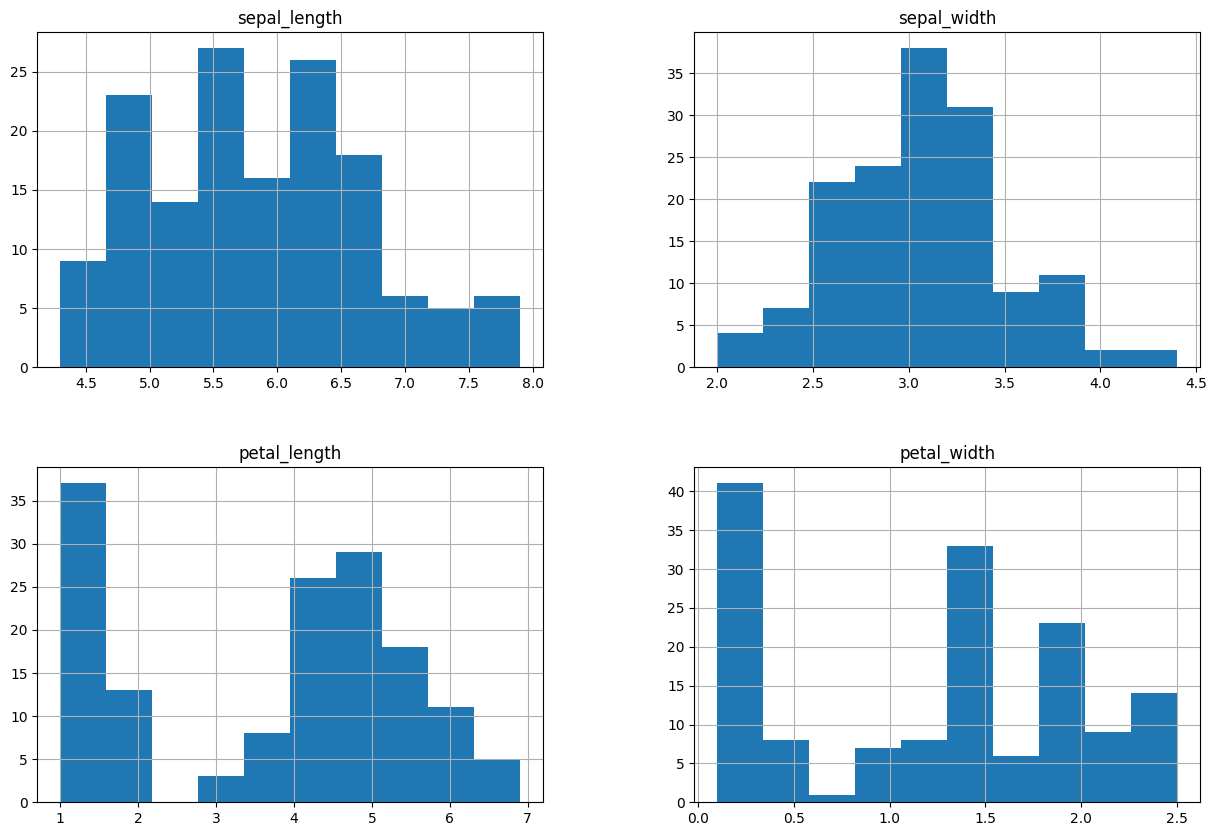

In [9]:
df.hist(figsize=(15,10))

In [10]:
colors=['red','yellow','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

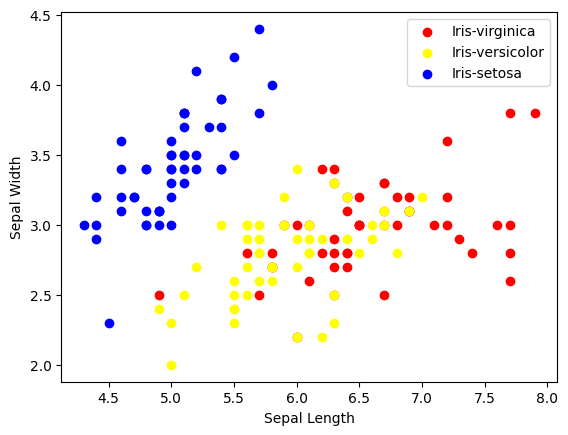

In [12]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

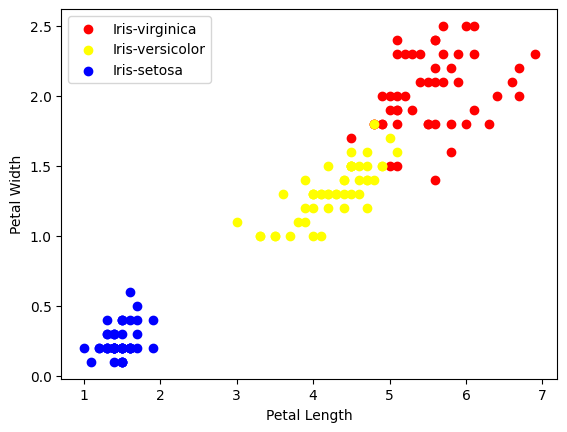

In [14]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

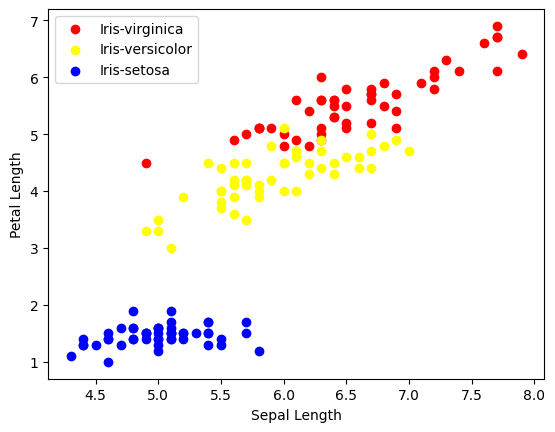

In [15]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

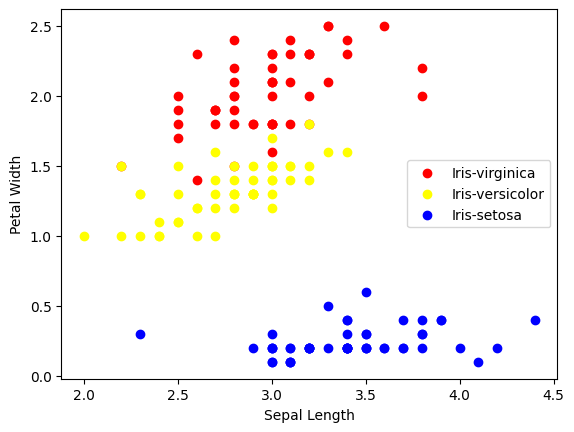

In [16]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()

In [19]:
b=pd.get_dummies(df.species)
b

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


# CORRELATION MATRIX

In [21]:
c.corr()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


<Axes: >

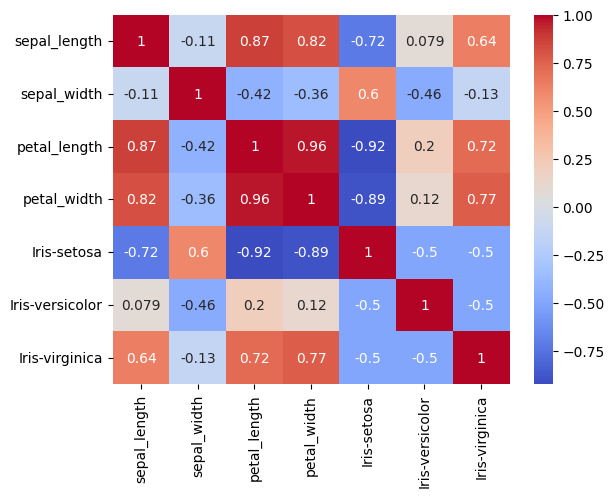

In [22]:
sns.heatmap(c.corr(),annot=True,cmap='coolwarm')

# MODEL TRAINING AND TESTING

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [24]:
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [25]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ",model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  95.55555555555556


In [26]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [27]:
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("KNeighbors Classifier Accuracy: ",model.score(x_test,y_test)*100)

KNeighbors Classifier Accuracy:  95.55555555555556


In [28]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [29]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Decision Tree Accuracy: ",model.score(x_test,y_test)*100)

Decision Tree Accuracy:  95.55555555555556


In [30]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [31]:
import pickle
fname='saved.sav'
pickle.dump(model,open(fname,'wb'))

In [32]:
load_model=pickle.load(open(fname,'rb'))

In [33]:
load_model.predict([[5.5,3.6,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

In [34]:
ld=load_model.predict([[6.7,3.0,5.2,2.3]])
ld

array(['Iris-virginica'], dtype=object)

Enter the values for sepal length , sepal width ,petal length and petal width
Enter four values: 5.1 3.5	1.4 0.2
sepal length :  5.1
sepal width:  3.5
petal length :  1.4
petal width :  0.2

['Iris-setosa']


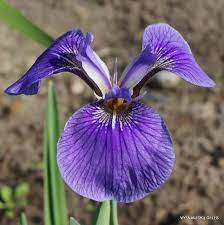

In [38]:
print("Enter the values for sepal length , sepal width ,petal length and petal width")
w,x, y, z = input("Enter four values: ").split()  
print("sepal length : ", w)  
print("sepal width: ", x)  
print("petal length : ", y) 
print("petal width : ", z) 
print()  

ld=load_model.predict([[w,x,y,z]])
ld
print(ld)


respond = ld 
from IPython.display import Image, display

virginica = "virginica.jpg"
setosa = "setosa.jpg"
versicolor = "versicolor.jpg"

if respond == "Iris-virginica":
    display(Image(data=virginica, width=200, height=200))
    
elif respond == "Iris-versicolor":
    display(Image(data=versicolor, width=200, height=200))

else: 
    display(Image(data=setosa, width=200, height=200))